In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Question 5        


With focus on the structural types identified from the question above, what floor types best suited the structural type?

#5.1 READ DATA SET

In [ ]:
#read the data set given
#Input_data =pd.read_csv('input_features.csv')
import requests
from io import StringIO
orig_url='https://drive.google.com/file/d/1diIY4R71InLOZXj60SRsONE_LLmufhJ7/view?usp=sharing' #link to input_features
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
Input_data = pd.read_csv(csv_raw) #stored in dataframe Input_data


Input_data


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#read the target data set which contains damage grade for each building
#Damage_gradedata =pd.read_csv('target_values.csv')
orig_url='https://drive.google.com/file/d/1Wkl4AePRfPMQ4hkcfeYPLHCYaducZy6D/view?usp=sharing' #link to target_values
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
Damage_gradedata = pd.read_csv(csv_raw) #stored in Dataframe damaged_gradedata
Damage_gradedata


,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


#5.2. MERGE THE TWO FILES AFTER LOADING

In [ ]:
# merging the two data sets given
Merge_data =pd.merge(Input_data,Damage_gradedata,on='building_id')
Merge_data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
categorial_dtype = ['land_surface_condition', 'foundation_type','roof_type', 'ground_floor_type','other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

Merge_data[categorial_dtype] = Merge_data[categorial_dtype].astype('category')

In [ ]:
binary_dtype = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone' , 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick' , 'has_superstructure_timber', 'has_superstructure_bamboo','has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered','has_superstructure_other','has_secondary_use','has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']

Merge_data[binary_dtype] = Merge_data[binary_dtype].astype('boolean')

In [ ]:
Merge_data.dtypes

building_id                                  int64
geo_level_1_id                               int64
geo_level_2_id                               int64
geo_level_3_id                               int64
count_floors_pre_eq                          int64
age                                          int64
area_percentage                              int64
height_percentage                            int64
land_surface_condition                    category
foundation_type                           category
roof_type                                 category
ground_floor_type                         category
other_floor_type                          category
position                                  category
plan_configuration                        category
has_superstructure_adobe_mud               boolean
has_superstructure_mud_mortar_stone        boolean
has_superstructure_stone_flag              boolean
has_superstructure_cement_mortar_stone     boolean
has_superstructure_mud_mortar_b

A. GET THE COLUMNS OF THE MERGED DATA SET

In [ ]:
#print the columns of the merged data set
Merge_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

#5.4. SELECT THE COLUMNS NEEDED FOR FINDING THE BEST FLOOR TYPE TO USE

In [ ]:
# select the needed columns for analysis
New_dataset=Merge_data[['building_id','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','ground_floor_type', 'other_floor_type',
       'damage_grade']]
print(New_dataset)

        building_id  ...  damage_grade
0            802906  ...             3
1             28830  ...             2
2             94947  ...             3
3            590882  ...             2
4            201944  ...             3
...             ...  ...           ...
260596       688636  ...             2
260597       669485  ...             3
260598       602512  ...             3
260599       151409  ...             2
260600       747594  ...             3

[260601 rows x 15 columns]


#5.5. GET THE CLASS TYPE, INFORMATION, SHAPE AND DESCRIPTION OF THE DATASET

In [ ]:
#find out the class type of the data set which is a data frame
type(New_dataset)

pandas.core.frame.DataFrame

In [ ]:
#let us get the basic information about the data set
New_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   has_superstructure_adobe_mud            260601 non-null  boolean 
 2   has_superstructure_mud_mortar_stone     260601 non-null  boolean 
 3   has_superstructure_stone_flag           260601 non-null  boolean 
 4   has_superstructure_cement_mortar_stone  260601 non-null  boolean 
 5   has_superstructure_mud_mortar_brick     260601 non-null  boolean 
 6   has_superstructure_cement_mortar_brick  260601 non-null  boolean 
 7   has_superstructure_timber               260601 non-null  boolean 
 8   has_superstructure_bamboo               260601 non-null  boolean 
 9   has_superstructure_rc_non_engineered    260601 non-null  boolean 
 10  has_superstructure_rc_engineered

In [ ]:
# let us find the shape of the data frame
New_dataset.shape

(260601, 15)

In [ ]:
# let us get the basic description summaries of the attributes in the dataframe
New_dataset.describe()

,building_id,damage_grade
count,2.606010e+05,260601.000000
mean,5.256755e+05,2.238272
std,3.045450e+05,0.611814
min,4.000000e+00,1.000000
25%,2.611900e+05,2.000000
50%,5.257570e+05,2.000000
75%,7.897620e+05,3.000000
max,1.052934e+06,3.000000


#5.6. CHECK FOR NULL DATA.

After analysis, it was determined that null data was not present in the selected columns under analytical observation

In [ ]:
#check if there are any NULL or missing values and get the sum for each attribute
New_dataset.isnull().sum()

#there are no null or missing values in the data set

building_id                               0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
ground_floor_type                         0
other_floor_type                          0
damage_grade                              0
dtype: int64

In [ ]:
New_dataset.columns

Index(['building_id', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'ground_floor_type', 'other_floor_type', 'damage_grade'],
      dtype='object')

In [ ]:
#Group the data set by damage level and finding the mean of the entries
Data_grouped=New_dataset.groupby('damage_grade')[['building_id','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'ground_floor_type', 'other_floor_type']].mean()

print (Data_grouped)

                building_id  ...  has_superstructure_other
damage_grade                 ...                          
1             527141.327615  ...                  0.026110
2             524830.460512  ...                  0.015163
3             526689.657250  ...                  0.011477

[3 rows x 12 columns]


A. A new column is added which represent the descriptive text of the damage grade levels.
damage_grade 1 = low damage
damage_grade 1 = medium damage
damage_grade 3 = complete destruction or damage.

In [ ]:
#define a function which gives a tag to the data set according to the damage level where 1 = low damage, 2= medium damage and 3 = complete destruction.
def Damage_group(damage_grade):
    if damage_grade == 1:
        return 'low damage'
    elif damage_grade == 2:
        return 'medium damage'
    else:
        return 'complete destruction'

In [ ]:
# Applying the function defined to the data set
# creating a new variable in the dataset to hold the damage category

New_dataset['Damage_category'] = New_dataset['damage_grade'].apply(Damage_group)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# print the new data set with the inclusion of the damage category
New_dataset_damagecategory= New_dataset[['building_id','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','ground_floor_type', 'other_floor_type',
       'damage_grade','Damage_category']]
New_dataset_damagecategory

,building_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,ground_floor_type,other_floor_type,damage_grade,Damage_category
0,802906,True,True,False,False,False,False,False,False,False,False,False,f,q,3,complete destruction
1,28830,False,True,False,False,False,False,False,False,False,False,False,x,q,2,medium damage
2,94947,False,True,False,False,False,False,False,False,False,False,False,f,x,3,complete destruction
3,590882,False,True,False,False,False,False,True,True,False,False,False,f,x,2,medium damage
4,201944,True,False,False,False,False,False,False,False,False,False,False,f,x,3,complete destruction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,False,True,False,False,False,False,False,False,False,False,False,f,j,2,medium damage
260597,669485,False,True,False,False,False,False,False,False,False,False,False,f,q,3,complete destruction
260598,602512,False,True,False,False,False,False,False,False,False,False,False,f,q,3,complete destruction
260599,151409,False,False,False,False,False,True,False,False,False,False,False,v,s,2,medium damage


#5.7. ANALYSE THE STRUCTURAL TYPES AND FLOOR TYPES.

in this section, the structural types and floor types were analysed along the damage level to find the best floor type and structure that were least damaged after the earth quake

In [ ]:
# get the buildings whose structure is mud_mortar_stone structure with corresponding damage grade
mud_mortar_stone = New_dataset_damagecategory.loc[New_dataset_damagecategory. has_superstructure_mud_mortar_stone==1, ['building_id', 'has_superstructure_mud_mortar_stone','ground_floor_type', 'other_floor_type','damage_grade','Damage_category']]
mud_mortar_stone


,building_id,has_superstructure_mud_mortar_stone,ground_floor_type,other_floor_type,damage_grade,Damage_category
0,802906,True,f,q,3,complete destruction
1,28830,True,x,q,2,medium damage
2,94947,True,f,x,3,complete destruction
3,590882,True,f,x,2,medium damage
5,333020,True,f,q,2,medium damage
...,...,...,...,...,...,...
260595,827012,True,f,q,3,complete destruction
260596,688636,True,f,j,2,medium damage
260597,669485,True,f,q,3,complete destruction
260598,602512,True,f,q,3,complete destruction


In [ ]:
# get the buildings that have adobe mud structure with building ID, damage grade 3 and damage category
Adobe_mud = New_dataset_damagecategory.loc[New_dataset_damagecategory.has_superstructure_adobe_mud==1, ['building_id','has_superstructure_adobe_mud','ground_floor_type', 'other_floor_type','damage_grade','Damage_category']]
Adobe_mud

,building_id,has_superstructure_adobe_mud,ground_floor_type,other_floor_type,damage_grade,Damage_category
0,802906,True,f,q,3,complete destruction
4,201944,True,f,x,3,complete destruction
17,980230,True,f,q,3,complete destruction
20,793397,True,f,q,2,medium damage
29,529366,True,f,q,3,complete destruction
...,...,...,...,...,...,...
260465,325362,True,f,q,2,medium damage
260488,934140,True,f,q,2,medium damage
260506,88833,True,f,q,3,complete destruction
260510,278052,True,f,q,3,complete destruction


In [ ]:
# get the buildings that have stone flag structure with building ID, damage grade 3 and damage category
stone_flag = New_dataset_damagecategory.loc[New_dataset_damagecategory.has_superstructure_stone_flag==1, ['building_id','has_superstructure_stone_flag','ground_floor_type', 'other_floor_type','damage_grade','Damage_category']]
stone_flag

,building_id,has_superstructure_stone_flag,ground_floor_type,other_floor_type,damage_grade,Damage_category
14,605134,True,f,x,3,complete destruction
40,306024,True,f,x,2,medium damage
51,877361,True,f,x,2,medium damage
103,96470,True,z,q,2,medium damage
110,677652,True,f,q,3,complete destruction
...,...,...,...,...,...,...
260496,1001309,True,f,x,3,complete destruction
260527,403411,True,f,j,2,medium damage
260572,333974,True,z,x,3,complete destruction
260581,518494,True,f,x,3,complete destruction


In [ ]:
# get the buildings that have cement_mortar_stone structure with building ID, damage grade 3 and damage category
cement_mortar_stone = New_dataset_damagecategory.loc[New_dataset_damagecategory.has_superstructure_cement_mortar_stone==1, ['building_id','has_superstructure_cement_mortar_stone','ground_floor_type', 'other_floor_type','damage_grade','Damage_category']]
cement_mortar_stone

,building_id,has_superstructure_cement_mortar_stone,ground_floor_type,other_floor_type,damage_grade,Damage_category
88,931198,True,v,j,2,medium damage
159,913994,True,f,q,2,medium damage
226,122112,True,v,s,2,medium damage
279,597468,True,v,s,2,medium damage
316,374000,True,v,s,1,low damage
...,...,...,...,...,...,...
260440,183654,True,v,x,3,complete destruction
260489,869675,True,x,q,3,complete destruction
260498,244286,True,v,s,2,medium damage
260540,404418,True,x,x,2,medium damage


In [ ]:
# get the buildings that have timber structure with building ID, damage grade 3 and damage category
timber = New_dataset_damagecategory.loc[New_dataset_damagecategory.has_superstructure_timber==1, ['building_id','has_superstructure_timber','ground_floor_type', 'other_floor_type','damage_grade','Damage_category']]
timber

,building_id,has_superstructure_timber,ground_floor_type,other_floor_type,damage_grade,Damage_category
3,590882,True,f,x,2,medium damage
7,475515,True,v,x,1,low damage
8,441126,True,f,q,2,medium damage
10,7962,True,f,q,3,complete destruction
12,444381,True,x,x,2,medium damage
...,...,...,...,...,...,...
260583,192421,True,f,q,2,medium damage
260585,722577,True,f,x,2,medium damage
260587,603159,True,f,q,3,complete destruction
260590,695987,True,f,q,2,medium damage


In [ ]:
# get the buildings that have bamboo structure with building ID, damage grade 3 and damage category
bamboo = New_dataset_damagecategory.loc[New_dataset_damagecategory.has_superstructure_bamboo==1, ['building_id','has_superstructure_bamboo','ground_floor_type', 'other_floor_type','damage_grade','Damage_category']]
bamboo

,building_id,has_superstructure_bamboo,ground_floor_type,other_floor_type,damage_grade,Damage_category
3,590882,True,f,x,2,medium damage
12,444381,True,x,x,2,medium damage
76,425720,True,f,x,1,low damage
85,67684,True,f,x,3,complete destruction
100,623033,True,x,q,2,medium damage
...,...,...,...,...,...,...
260564,43915,True,f,x,2,medium damage
260565,296490,True,f,q,2,medium damage
260573,663276,True,f,q,3,complete destruction
260577,185096,True,f,q,2,medium damage


In [ ]:
# get the buildings that have non engineered structure with building ID
non_engineerd = New_dataset_damagecategory.loc[New_dataset_damagecategory.has_superstructure_rc_non_engineered==1, ['building_id','has_superstructure_rc_non_engineered','ground_floor_type', 'other_floor_type','damage_grade','Damage_category']]
non_engineerd

,building_id,has_superstructure_rc_non_engineered,ground_floor_type,other_floor_type,damage_grade,Damage_category
45,440102,True,v,j,1,low damage
99,697129,True,f,x,2,medium damage
114,533100,True,v,s,1,low damage
140,958524,True,f,x,2,medium damage
208,1025864,True,f,x,2,medium damage
...,...,...,...,...,...,...
260498,244286,True,v,s,2,medium damage
260510,278052,True,f,q,3,complete destruction
260520,353176,True,v,j,1,low damage
260550,534789,True,f,x,2,medium damage


In [ ]:
#get the buildings that have engineered structured 
engineerd = New_dataset_damagecategory.loc[New_dataset_damagecategory.has_superstructure_rc_engineered==1, ['building_id','has_superstructure_rc_engineered','ground_floor_type', 'other_floor_type','damage_grade','Damage_category']]
engineerd

,building_id,has_superstructure_rc_engineered,ground_floor_type,other_floor_type,damage_grade,Damage_category
53,288541,True,v,j,1,low damage
71,708530,True,v,j,2,medium damage
108,635262,True,v,j,1,low damage
248,920565,True,x,s,1,low damage
311,799072,True,v,s,1,low damage
...,...,...,...,...,...,...
260213,539650,True,v,s,1,low damage
260271,161297,True,v,s,1,low damage
260458,177964,True,x,j,1,low damage
260530,344478,True,v,s,1,low damage


In [ ]:
#get the buildings that have other type of structure
other_struct = New_dataset_damagecategory.loc[New_dataset_damagecategory.has_superstructure_other==1, ['building_id','has_superstructure_other','ground_floor_type', 'other_floor_type','damage_grade','Damage_category']]
other_struct

,building_id,has_superstructure_other,ground_floor_type,other_floor_type,damage_grade,Damage_category
49,402996,True,v,j,1,low damage
61,1044113,True,f,q,2,medium damage
608,94919,True,f,q,1,low damage
615,200363,True,f,q,2,medium damage
659,444343,True,f,x,3,complete destruction
...,...,...,...,...,...,...
260486,185565,True,f,q,2,medium damage
260496,1001309,True,f,x,3,complete destruction
260500,23479,True,f,q,2,medium damage
260523,70536,True,f,j,2,medium damage


# 5.8. EXPLANATORY DATA ANALYSIS

Here, the data is analysed showing the buildings damaged according to structural type. Data visualisation was conduted in this section using Bar chart.

THE DAMAGE ANALYSIS ON THE STRUCTURAL TYPES AND FLOOR TYPES WHICH YIELDED A RESULT.


1.   **Adobe mud structural types**

*   Damage level 2=1822 buildings
*   Damage level 3=1113 buildings
*   Damage level 1=80 buildings

2.   **Mud motar stone structural types**

*   Damage level 2=15199 buildings
*   Damage level 3=10269 buildings
*   Damage level 1=1181 buildings

3.   **Stone flag structural types**

*   Damage level 2=609 buildings
*   Damage level 3=552 buildings
*   Damage level 1=23 buildings

4.   **Cement motar structural types**

*   Damage level 2=420 buildings
*   Damage level 1=109 buildings
*   Damage level 3=103 buildings

5.   **Timber structural types**

*   Damage level 2=5369 buildings
*   Damage level 3=2468 buildings
*   Damage level 1=977 buildings

6.   **Bamboo structural types**

*   Damage level 2=1930 buildings
*   Damage level 3=702 buildings
*   Damage level 1=380 buildings

7.   **Rc non engineered structural types**

*   Damage level 2=764 buildings
*   Damage level 1=525 buildings
*   Damage level 3=180 buildings

8.   **Rc engineered structural types**

*   Damage level 1= 349 buildings
*   Damage level 2=217 buildings
*   Damage level 3=12 buildings

9.   **Other structural types**

*   Damage level 2=319 buildings
*   Damage level 3=125 buildings
*   Damage level 1=85 buildings






In [ ]:
# get the number of buildings with damage leve 1,2,3 according to structural type adobe_mud
#Adobe_mud.groupby('damage_grade').other_floor_type.size().sort_values(ascending=False) 
#finding the damage level of the floor types
Adobe_mud.groupby(['damage_grade','ground_floor_type', 'other_floor_type']).size().sort_values(ascending=False)




damage_grade  ground_floor_type  other_floor_type
2             f                  q                   8889
3             f                  q                   5295
2             f                  x                   2274
3             f                  x                   1941
2             x                  q                    960
              f                  j                    858
3             f                  j                    552
              x                  q                    469
1             f                  q                    311
2             x                  x                    289
              v                  q                    179
3             x                  x                    171
1             f                  j                     97
2             x                  j                     78
              f                  s                     77
1             f                  x                     77
2             v       

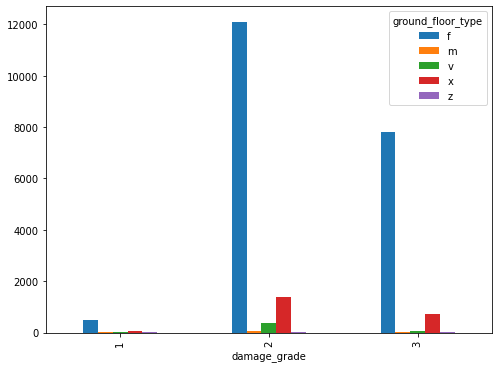

In [ ]:
#Representing the Adobe structure using bar plot
Adobe_mud.groupby('damage_grade').ground_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

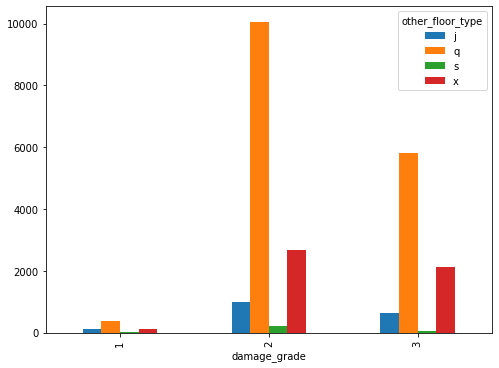

In [ ]:
#Representing the Adobe structure using bar plot for other floor types (type of construction used in higher than the ground floors except for the roof)
Adobe_mud.groupby('damage_grade').other_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to structural type mud_mortar_stone
#mud_mortar_stone.groupby('damage_grade').other_floor_type.value_counts().sort_values(ascending=False) - finding the damage level of the floor types
mud_mortar_stone.groupby(['damage_grade','ground_floor_type', 'other_floor_type']).size().sort_values(ascending=False)

damage_grade  ground_floor_type  other_floor_type
2             f                  q                   75452
3             f                  q                   48563
2             f                  x                   14881
3             f                  x                   11847
2             f                  j                   10111
3             f                  j                    7768
2             x                  q                    7645
1             f                  q                    5107
3             x                  q                    4391
2             x                  x                    2021
3             x                  x                    1598
1             f                  j                    1446
                                 x                    1146
2             v                  q                    1102
              x                  j                    1100
3             x                  j                     957
1     

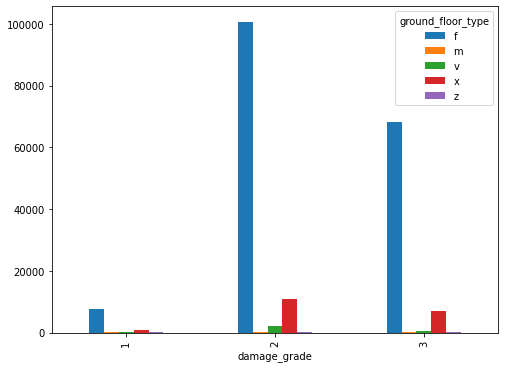

In [ ]:
#Representing the Mud mortar stone structure using bar plot
mud_mortar_stone.groupby('damage_grade').ground_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

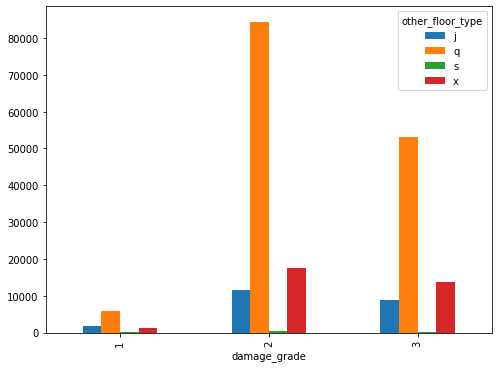

In [ ]:
#Representing the Mud mortar stone structure using bar plot
mud_mortar_stone.groupby('damage_grade').other_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to structural type stone flag
#stone_flag.groupby('damage_grade').other_floor_type.value_counts().sort_values(ascending=False) - finding the damage level of the floor types
stone_flag.groupby(['damage_grade','ground_floor_type', 'other_floor_type']).size().sort_values(ascending=False)

damage_grade  ground_floor_type  other_floor_type
2             f                  q                   1762
3             f                  x                   1485
2             f                  x                   1419
3             f                  q                   1318
                                 j                    516
2             f                  j                    465
3             x                  x                    392
2             x                  q                    181
3             x                  q                    167
                                 j                    162
2             x                  x                    143
                                 j                    106
              z                  q                     98
                                 j                     90
3             z                  j                     63
                                 x                     58
2             z       

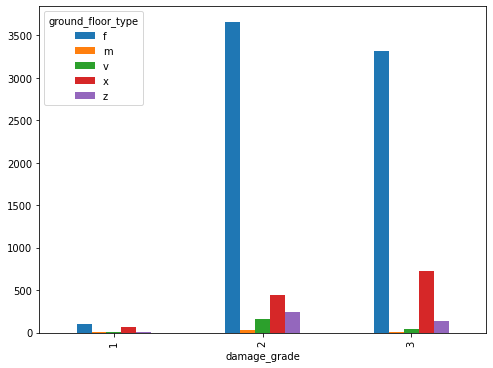

In [ ]:
#Representing the stone flag structure using bar plot
stone_flag.groupby('damage_grade').ground_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

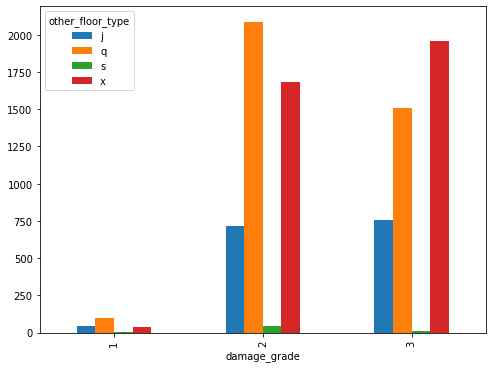

In [ ]:
#Representing the stone flag structure using bar plot
stone_flag.groupby('damage_grade').other_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to structural type cement_mortar_stone
#cement_mortar_stone.groupby('damage_grade').other_floor_type.value_counts().sort_values(ascending=False) - finding the damage level of the floor types
cement_mortar_stone.groupby(['damage_grade','ground_floor_type', 'other_floor_type']).size().sort_values(ascending=False)

damage_grade  ground_floor_type  other_floor_type
2             f                  q                   865
              v                  s                   367
              f                  x                   347
              v                  j                   292
                                 q                   273
              x                  q                   239
              v                  x                   214
1             v                  s                   199
3             f                  q                   176
1             v                  j                   174
2             x                  x                   164
                                 j                   154
              f                  j                   151
3             f                  x                    94
1             f                  q                    88
2             x                  s                    83
1             x                  j    

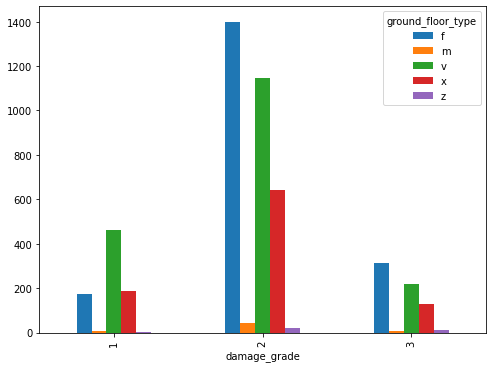

In [ ]:
#Representing the cement mortar stone structure using bar plot
cement_mortar_stone.groupby('damage_grade').ground_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

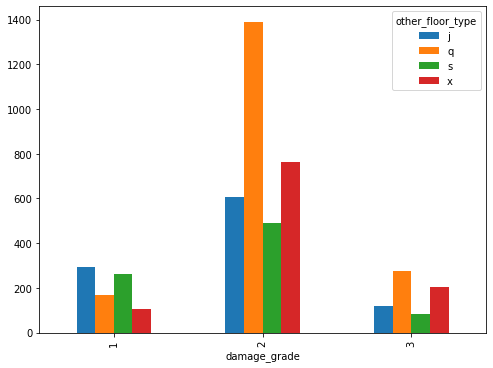

In [ ]:
#Representing the cement mortar stone structure using bar plot
cement_mortar_stone.groupby('damage_grade').other_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to structural type timber
#timber.groupby('damage_grade').other_floor_type.value_counts().sort_values(ascending=False) - finding the damage level of the floor types
timber.groupby(['damage_grade','ground_floor_type', 'other_floor_type']).size().sort_values(ascending=False)

damage_grade  ground_floor_type  other_floor_type
2             f                  q                   22083
3             f                  q                   10285
2             f                  x                    7693
                                 j                    4162
3             f                  x                    3893
2             x                  q                    2540
1             f                  q                    2506
3             f                  j                    2018
1             f                  x                    1851
                                 j                    1824
3             x                  q                    1086
2             x                  x                     871
              v                  x                     721
                                 q                     663
3             x                  x                     662
2             x                  j                     442
      

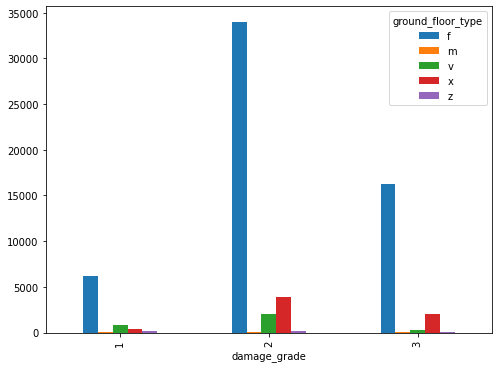

In [ ]:
#Representing the Timber structure using bar plot
timber.groupby('damage_grade').ground_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

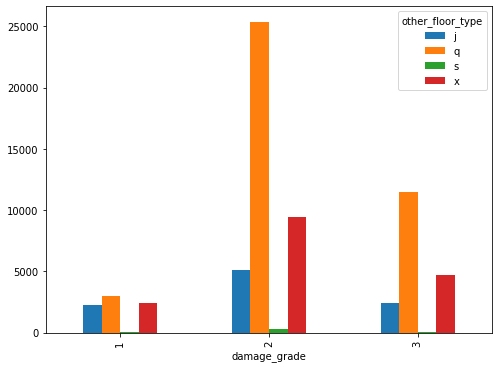

In [ ]:
#Representing the Timber structure using bar plot
timber.groupby('damage_grade').other_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to structural type bamboo
bamboo.groupby(['damage_grade','ground_floor_type', 'other_floor_type']).size().sort_values(ascending=False)

damage_grade  ground_floor_type  other_floor_type
2             f                  q                   8427
3             f                  q                   3317
2             f                  x                   2177
                                 j                   2069
1             f                  q                    972
                                 j                    926
3             f                  x                    835
                                 j                    727
1             f                  x                    614
2             x                  q                    493
                                 x                    228
              v                  q                    188
3             x                  q                    171
2             x                  j                    141
              v                  x                    133
3             x                  x                    128
                      

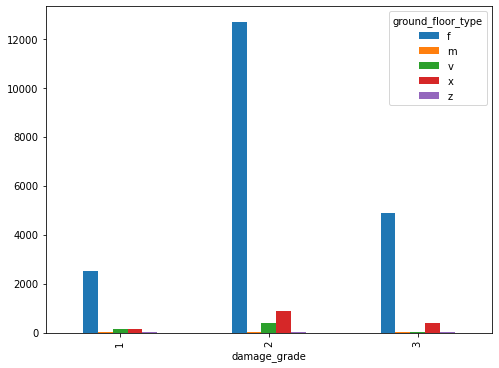

In [ ]:
#Representing the Bamboo structure using bar plot
bamboo.groupby('damage_grade').ground_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to structural type non_engineered
#non_engineerd.groupby('damage_grade').other_floor_type.value_counts().sort_values(ascending=False) - finding the damage level of the floor types
non_engineerd.groupby(['damage_grade','ground_floor_type', 'other_floor_type']).size().sort_values(ascending=False)

damage_grade  ground_floor_type  other_floor_type
1             v                  s                   2072
2             v                  s                   2068
1             v                  j                   1186
2             f                  q                   1078
              v                  j                    915
              f                  x                    736
3             f                  x                    468
                                 q                    403
2             x                  q                    268
              f                  j                    242
3             f                  j                    223
1             f                  q                    150
3             v                  s                    143
2             x                  s                    124
1             x                  s                    124
2             x                  j                    106
              v       

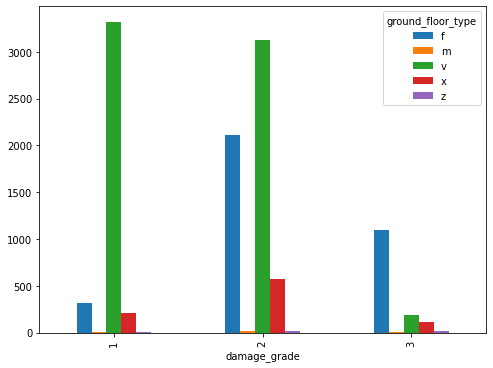

In [ ]:
#Representing the rc non engineered (no reinforced concrete) structure using bar plot
non_engineerd.groupby('damage_grade').ground_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

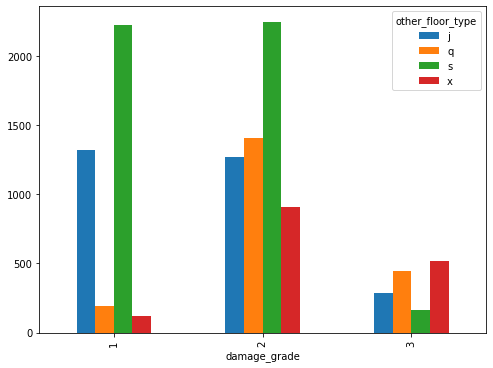

In [ ]:
#Representing the RC non engineered ( not reinforced with concrete) structure using bar plot
non_engineerd.groupby('damage_grade').other_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to structural type engineered
#engineerd.groupby('damage_grade').other_floor_type.value_counts().sort_values(ascending=False) - finding the damage level of the floor types
engineerd.groupby(['damage_grade','ground_floor_type', 'other_floor_type']).size().sort_values(ascending=False)

damage_grade  ground_floor_type  other_floor_type
1             v                  s                   1821
2             v                  s                    954
1             v                  j                    663
2             v                  j                    318
1             x                  s                     74
2             x                  s                     64
3             v                  s                     53
1             x                  j                     36
2             x                  j                     21
1             f                  s                     19
                                 j                     15
2             f                  s                     12
                                 j                      7
                                 q                      7
              v                  x                      6
3             v                  j                      5
1             v       

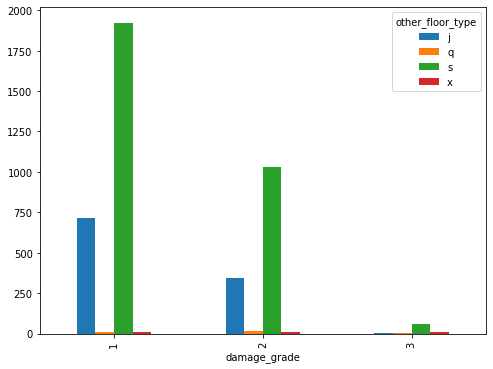

In [ ]:
#Representing the engineered structure using bar plot
engineerd.groupby('damage_grade').other_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

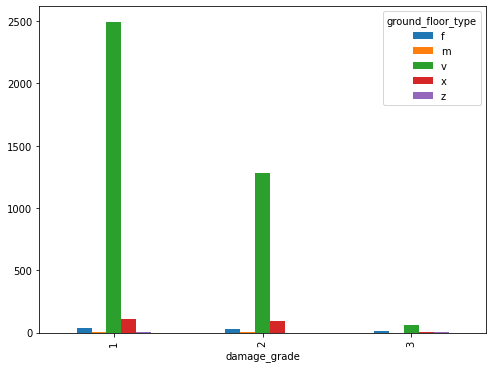

In [ ]:
#Representing the engineered structure using bar plot 
engineerd.groupby('damage_grade').ground_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to structural type other
other_struct.groupby(['damage_grade','ground_floor_type', 'other_floor_type']).size().sort_values(ascending=False)

damage_grade  ground_floor_type  other_floor_type
2             f                  q                   1203
3             f                  q                    508
2             f                  x                    356
                                 j                    273
1             f                  j                    252
3             f                  x                    165
1             f                  q                    135
3             f                  j                    118
              x                  x                    104
1             f                  x                     94
2             x                  q                     74
                                 x                     73
                                 j                     55
1             v                  j                     49
2             v                  q                     49
                                 j                     42
1             v       

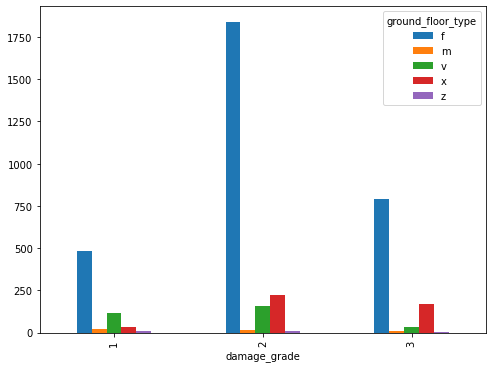

In [ ]:
#Representing the other structure using bar plot
other_struct.groupby('damage_grade').ground_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

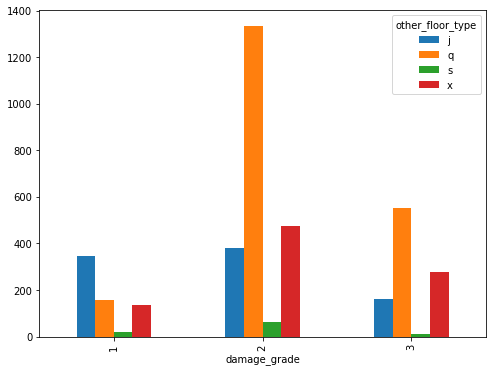

In [ ]:
#Representing the other structure using bar plot
other_struct.groupby('damage_grade').other_floor_type.value_counts().unstack().plot.bar(figsize=(8,6))

#5.9. RESULT
After analysing the data set above, two observatory conclusions were drawn;

1. The structural typed which had the least damage grade was ENGINEERED REINFORCED CONCRETE which had a total of 578 damaged building where 
*   Damage grade 1 = 349 buildings
*   Damage grade 2 = 217 buildings
*   Damage grade 3 = 12 buildings

2. The floor types associated with the least damaged structure are;
*   ground floor types are F, M and V.
*   other floor types are S, Q and J.


**SOLUTION**

THE BEST FLOOR TYPES TO USE FOR GROUND FLOOR TYPE ARE **F, M AND V**.
THE BEST FLOOR TYPES TO USE FOR THE OF FLOOR USED IN OTHER FLOORS HIGHER THAN THE GROUND FLOOR (EXCEPT FOR THE ROOF) ARE S, Q AND J.






# QUESTION 7

Is the damage level influenced by the legal owners and the building’s secondary use?

In [ ]:
Merge_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
# select the needed columns for analysis
New_dataset1=Merge_data[['building_id',
       'legal_ownership_status','has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'damage_grade']]
New_dataset1

,building_id,legal_ownership_status,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,v,False,False,False,False,False,False,False,False,False,False,False,3
1,28830,v,False,False,False,False,False,False,False,False,False,False,False,2
2,94947,v,False,False,False,False,False,False,False,False,False,False,False,3
3,590882,v,False,False,False,False,False,False,False,False,False,False,False,2
4,201944,v,False,False,False,False,False,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,v,False,False,False,False,False,False,False,False,False,False,False,2
260597,669485,v,False,False,False,False,False,False,False,False,False,False,False,3
260598,602512,v,False,False,False,False,False,False,False,False,False,False,False,3
260599,151409,v,False,False,False,False,False,False,False,False,False,False,False,2


# 7.1. ANALYSING THE LEGA OWNERSHIP CATEGORY AND BUILDING USE TYPES


in this section, the legal ownership types and building use were analysed along the damage level to find the if damaged level is influenced by legal ownership and building use after the earth quake.



In [ ]:
# get the damage grade whose use is secondary_use  with corresponding legal ownership
secondary_use = New_dataset1.loc[New_dataset1. has_secondary_use==1, ['building_id', 'has_secondary_use','legal_ownership_status','damage_grade']]
secondary_use

,building_id,has_secondary_use,legal_ownership_status,damage_grade
5,333020,True,v,2
20,793397,True,v,2
26,973909,True,v,2
45,440102,True,v,1
57,552720,True,v,2
...,...,...,...,...
260579,977263,True,v,2
260584,317439,True,v,3
260587,603159,True,v,3
260591,560805,True,v,3


In [ ]:
# get the damage grade whose use is for agriculture  with corresponding legal ownership
agri_use = New_dataset1.loc[New_dataset1. has_secondary_use_agriculture==1, ['building_id', 'has_secondary_use_agriculture','legal_ownership_status','damage_grade']]
agri_use

,building_id,has_secondary_use_agriculture,legal_ownership_status,damage_grade
5,333020,True,v,2
20,793397,True,v,2
26,973909,True,v,2
57,552720,True,v,2
60,961851,True,v,2
...,...,...,...,...
260579,977263,True,v,2
260584,317439,True,v,3
260587,603159,True,v,3
260591,560805,True,v,3


In [ ]:
# get the damage grade whose use is for hotel with corresponding legal ownership
hotel_use = New_dataset1.loc[New_dataset1. has_secondary_use_hotel==1, ['building_id', 'has_secondary_use_hotel','legal_ownership_status','damage_grade']]
hotel_use

,building_id,has_secondary_use_hotel,legal_ownership_status,damage_grade
88,931198,True,a,2
120,824847,True,v,2
155,294469,True,v,2
166,670184,True,v,2
228,168711,True,v,2
...,...,...,...,...
260480,359059,True,v,2
260498,244286,True,v,2
260526,220849,True,v,3
260530,344478,True,v,1


In [ ]:
# get the damage grade whose use is for rental  with corresponding legal ownership
rental_use = New_dataset1.loc[New_dataset1. has_secondary_use_rental==1, ['building_id', 'has_secondary_use_rental','legal_ownership_status','damage_grade']]
rental_use

,building_id,has_secondary_use_rental,legal_ownership_status,damage_grade
45,440102,True,v,1
360,394060,True,v,3
484,194805,True,v,1
646,860885,True,v,2
1094,985153,True,v,1
...,...,...,...,...
259996,343308,True,v,1
260178,765716,True,v,1
260301,706986,True,v,2
260405,751326,True,v,1


In [ ]:
# get the damage grade whose use is for institution  with corresponding legal ownership
institution_use = New_dataset1.loc[New_dataset1. has_secondary_use_institution==1, ['building_id', 'has_secondary_use_institution','legal_ownership_status','damage_grade']]
institution_use

,building_id,has_secondary_use_institution,legal_ownership_status,damage_grade
1484,113294,True,v,2
1568,610116,True,v,1
3179,894973,True,v,2
3645,154360,True,v,3
6337,197064,True,v,1
...,...,...,...,...
252066,801169,True,v,1
253131,850420,True,v,2
257697,31613,True,v,2
258204,285989,True,v,1


In [ ]:
# get the damage grade whose use is for school with corresponding legal ownership
school_use = New_dataset1.loc[New_dataset1. has_secondary_use_school==1, ['building_id', 'has_secondary_use_school','legal_ownership_status','damage_grade']]
school_use

,building_id,has_secondary_use_school,legal_ownership_status,damage_grade
1389,434716,True,v,2
3525,566369,True,v,2
5307,332858,True,v,2
9009,745815,True,w,2
11977,219873,True,v,2
...,...,...,...,...
245712,345203,True,v,2
249144,355500,True,v,2
249649,436747,True,v,1
250763,538196,True,w,2


In [ ]:
# get the damage grade whose use is for industry with corresponding legal ownership
industry_use = New_dataset1.loc[New_dataset1. has_secondary_use_industry==1, ['building_id', 'has_secondary_use_industry','legal_ownership_status','damage_grade']]
industry_use

,building_id,has_secondary_use_industry,legal_ownership_status,damage_grade
279,597468,True,v,2
725,871546,True,v,2
887,984945,True,v,1
1660,3649,True,v,3
2307,316051,True,v,2
...,...,...,...,...
249244,1050749,True,v,3
250232,343636,True,a,3
251742,623127,True,v,1
253827,541640,True,v,3


In [ ]:
# get the damage grade whose use is for health post with corresponding legal ownership
healthpost_use = New_dataset1.loc[New_dataset1. has_secondary_use_health_post==1, ['building_id','legal_ownership_status','damage_grade']]
healthpost_use

,building_id,legal_ownership_status,damage_grade
574,364248,v,2
1926,510269,v,1
2095,669903,v,2
23692,38961,v,1
29400,104394,v,1
32634,760985,v,2
34956,675759,v,2
35145,973517,v,1
36592,358404,v,3
37940,487608,v,2


In [ ]:
# get the damage grade whose use is for industry with corresponding legal ownership
govoffice_use = New_dataset1.loc[New_dataset1. has_secondary_use_gov_office==1, ['building_id','legal_ownership_status','damage_grade']]
govoffice_use

,building_id,legal_ownership_status,damage_grade
27243,351973,v,2
45399,917970,v,1
47202,272889,v,1
55318,558033,v,2
63823,870651,v,2
75433,245054,v,1
82524,18057,v,2
83711,232672,v,2
88843,435284,v,2
98324,591554,v,1


In [ ]:
# get the damage grade whose use is for police with corresponding legal ownership
police_use = New_dataset1.loc[New_dataset1. has_secondary_use_use_police==1, ['building_id','legal_ownership_status','damage_grade']]
police_use

,building_id,legal_ownership_status,damage_grade
13239,737009,v,2
19750,979535,v,2
21059,124323,v,1
23040,296746,v,1
34060,24567,v,2
35711,692634,v,3
42695,555616,v,2
48560,716516,v,2
59839,850497,v,3
74456,372677,v,2


In [ ]:
# get the damage grade whose use is for other use with corresponding legal ownership
other_use = New_dataset1.loc[New_dataset1. has_secondary_use_other==1, ['building_id', 'has_secondary_use_other','legal_ownership_status','damage_grade']]
other_use

,building_id,has_secondary_use_other,legal_ownership_status,damage_grade
304,462457,True,v,2
442,719278,True,v,2
730,521737,True,v,2
1269,863731,True,v,2
1408,994094,True,w,3
...,...,...,...,...
258755,952382,True,v,2
259230,498666,True,v,1
260002,492007,True,v,3
260332,655553,True,v,2


# 7.2. EXPLANATORY DATA ANALYSIS
Here, the data is analysed showing the buildings damaged according to the legal ownership and building use. Data visualisation was conduted in this section using Bar chart.

THE DAMAGE ANALYSIS ON THE building use type AND legal ownership WHICH YIELDED the RESULT below.


1.   **secondary use**

*   Damage grade 2 = 17715
*   Damage grade 3 = 7193
*   Damage grade 1 = 4248


2.   **agriculture use**

*   Damage grade 2 = 10679
*   Damage grade 3 = 5269
*   Damage grade 1 = 829

3.   **hotel use**

*   Damage grade 2 = 5058
*   Damage grade 1 = 2216
*   Damage grade 3 = 1489

4.   **rental use**

*   Damage grade 2 = 1051
*   Damage grade 1 = 877
*   Damage grade 3 = 183

5.   **institution use**

*   Damage grade 2 = 129
*   Damage grade 1 = 99
*   Damage grade 3 = 17

6.   **school use**

*   Damaged grade 2 = 47
*   Damaged grade 1 = 30
*   Damaged grade 3 = 17

7.  **industry use**

*   Damaged grade 2 = 152
*   Damaged grade 3 = 68
*   Damaged grade 1 = 59

8.   **health post use**

*   Damaged grade 2 = 32
*   Damaged grade 1 = 12
*   Damaged grade 3 = 5

9.   **gov office use**

*   Damaged grade 2 = 21
*   Damaged grade 1 = 13
*   Damaged grade 3 = 4

10.   **police use**

*   Damaged grade 2 = 2
*   Damaged grade 3 = 7
*   Damaged grade 1 = 4

11.   **other use**

*   Damaged grade 2 = 852
*   Damaged grade 3 = 307
*   Damaged grade 1 = 175

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
secondary_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)


#builidng use type (secondary use)

damage_grade  legal_ownership_status
2             v                         16908
3             v                          6795
1             v                          3989
2             a                           465
              w                           237
1             a                           185
3             a                           174
              w                           145
2             r                           105
3             r                            79
1             w                            51
              r                            23
Name: legal_ownership_status, dtype: int64

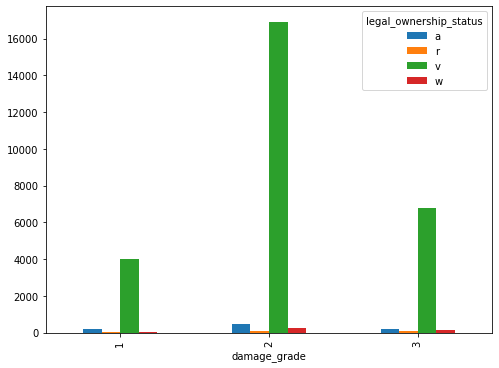

In [ ]:
#Representing the secondary use using bar plot
secondary_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
agri_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)


#builidng use type (Agriculture)

damage_grade  legal_ownership_status
2             v                         10318
3             v                          5058
1             v                           752
2             a                           179
              w                           133
3             w                            89
              r                            62
              a                            60
1             a                            59
2             r                            49
1             w                            12
              r                             6
Name: legal_ownership_status, dtype: int64

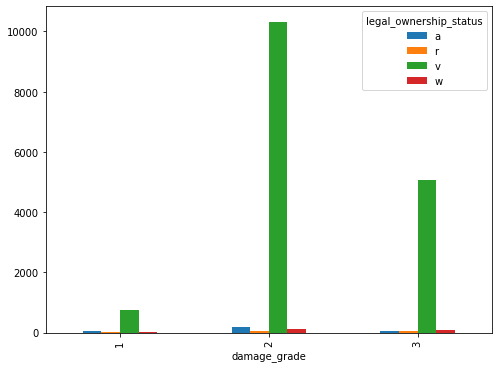

In [ ]:
#Representing the agriculture use using bar plot
agri_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
hotel_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)


#builidng use type (Hotel)

damage_grade  legal_ownership_status
2             v                         4674
1             v                         2075
3             v                         1328
2             a                          247
3             a                          101
1             a                           96
2             w                           87
              r                           50
3             w                           44
1             w                           31
3             r                           16
1             r                           14
Name: legal_ownership_status, dtype: int64

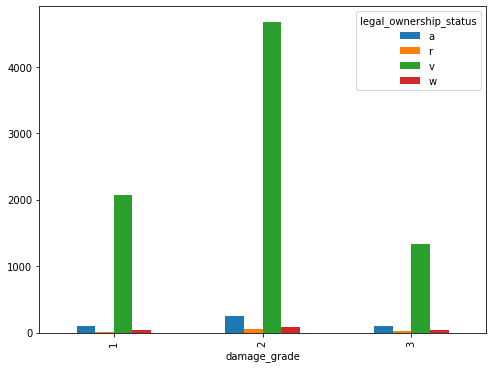

In [ ]:
#Representing the hotel use using bar plot
hotel_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
rental_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)


#builidng use type (rental)

damage_grade  legal_ownership_status
2             v                         1015
1             v                          848
3             v                          166
2             a                           24
1             a                           23
2             w                           10
3             w                            9
              a                            8
1             w                            5
2             r                            2
1             r                            1
Name: legal_ownership_status, dtype: int64

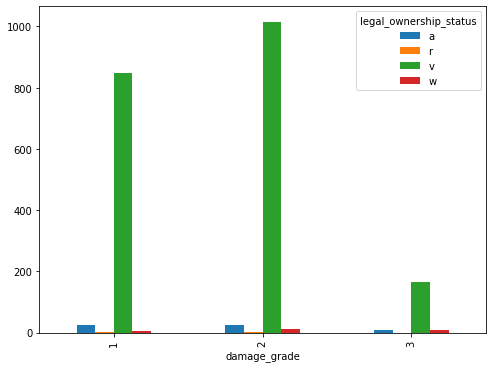

In [ ]:
#Representing the rental use using bar plot
rental_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
institution_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)


#builidng use type (institution)

damage_grade  legal_ownership_status
2             v                         126
1             v                          97
3             v                          17
2             w                           2
1             a                           2
2             r                           1
Name: legal_ownership_status, dtype: int64

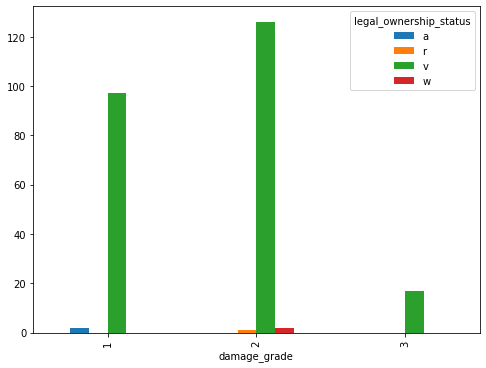

In [ ]:
#Representing the institution use using bar plot
institution_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
#school_use.groupby('damage_grade').legal_ownership_status.size().sort_values(ascending=False)
school_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)

#builidng use type (school)

damage_grade  legal_ownership_status
2             v                         45
1             v                         28
3             v                         16
2             w                          2
1             w                          2
3             w                          1
Name: legal_ownership_status, dtype: int64

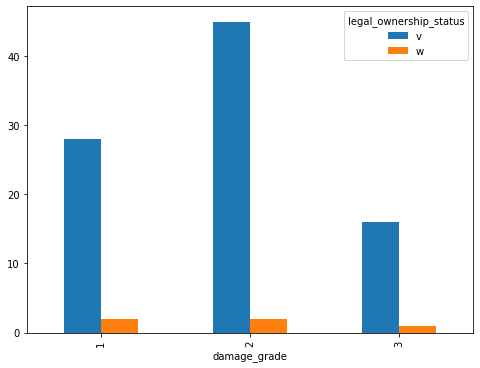

In [ ]:
#Representing the school use using bar plot
school_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
industry_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)


#builidng use type (industry)

damage_grade  legal_ownership_status
2             v                         144
3             v                          65
1             v                          57
2             a                           6
3             a                           3
2             r                           2
1             a                           2
Name: legal_ownership_status, dtype: int64

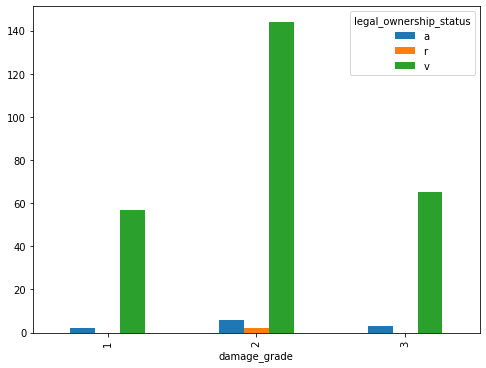

In [ ]:
#Representing the industry use using bar plot
industry_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
healthpost1=healthpost_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)
healthpost1

#builidng use type (Health post)

damage_grade  legal_ownership_status
2             v                         30
1             v                         12
3             v                          5
2             a                          2
Name: legal_ownership_status, dtype: int64

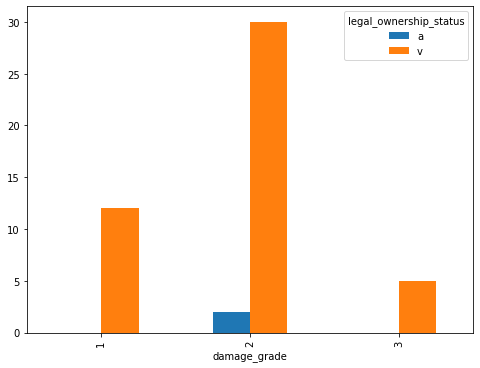

In [ ]:
#Representing the Health post use using bar plot
healthpost_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
govoffice1=govoffice_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)
govoffice1

#builidng use type (government office_use)

damage_grade  legal_ownership_status
2             v                         20
1             v                         13
3             v                          4
2             a                          1
Name: legal_ownership_status, dtype: int64

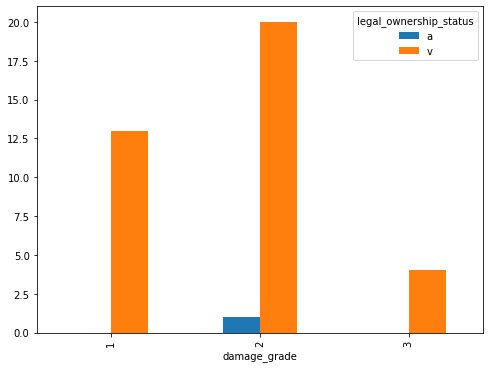

In [ ]:
#Representing the government office use using bar plot
govoffice_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
police1=police_use.groupby('damage_grade').legal_ownership_status.value_counts().sort_values(ascending=False)
police1

#builidng use type (Police)

damage_grade  legal_ownership_status
2             v                         12
3             v                          7
1             v                          4
Name: legal_ownership_status, dtype: int64

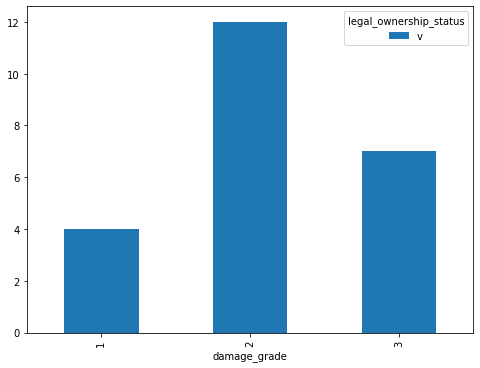

In [ ]:
#Representing the police use using bar plot
police_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

In [ ]:
# get the number of buildings with damage leve 1,2,3 according to legal ownership
other_use.groupby('damage_grade').legal_ownership_status.size().sort_values(ascending=False)


#builidng use type (Other)

damage_grade
2    852
3    307
1    175
Name: legal_ownership_status, dtype: int64

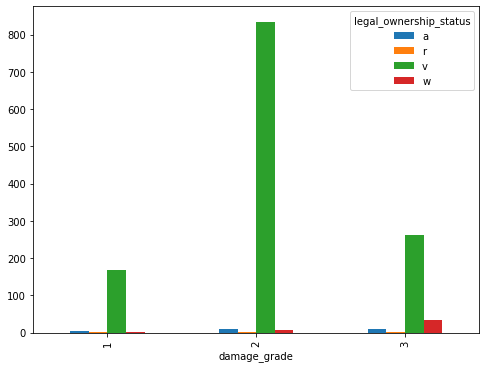

In [ ]:
#Representing the other use using bar plot
other_use.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

#7.3. FURTHER ANLAYSIS

after analysing the dataset above, we found 3 building use types had the least damaged building. They are Police, Government office and Health post.
legal status


1.   **police_use**

damage grade 2;
              legal_status (v)= 12

damage grade 3;
              legal_status (v)=7

damage grade 1;
              legal_status (v)=4


2.   **Government office use**

damage grade 2;
              legal_status (v)= 20
              legal_status (a) = 1

damage grade 1;
              legal_status (v)= 13

damage grade 3;
              legal_status (v)= 4

3.   **Health post**

damage grade 2;
              legal_status (v)= 30
              legal_status (a) = 2

damage grade 1;
              legal_status (v)= 12

damage grade 3;
              legal_status (v)= 5




In [ ]:
#Representing the concatenation of 3 data set containing (police_use, healthpost_use and govoffice_use)
merged1=pd.concat([healthpost_use,police_use]).drop_duplicates().reset_index(drop=True)  # concatenate healthpost_use and Police_use in merged1
merged2=pd.concat([merged1,govoffice_use]).drop_duplicates().reset_index(drop=True)   #concatenate merged1 and govoffice_use in merged 2
merged2


,building_id,legal_ownership_status,damage_grade
0,364248,v,2
1,510269,v,1
2,669903,v,2
3,38961,v,1
4,104394,v,1
...,...,...,...
105,303227,v,1
106,903195,v,2
107,661292,v,2
108,107539,v,2


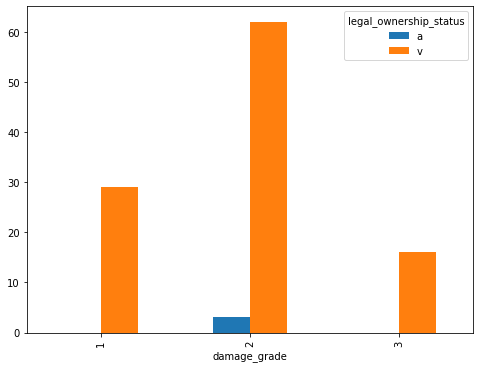

In [ ]:
#plot the graph for merged 2 data set to find the legal status count
merged2.groupby('damage_grade').legal_ownership_status.value_counts().unstack().plot.bar(figsize=(8,6))

#7.3. RESULT

After analysing the data set above,some observatory conclusions were drawn;

Is the damage level influenced by the legal owners and the building’s secondary use?

The buildings used as police station, Government office and Health post had relatively low number of buildings damaged after the earth quake.

By further analysisng the buildings used as police statsion, health post and government office we made noted two observation points.






  **CONCLUSION**






using general knowledge information available, the three building use types (government, police and health post) are owned by the government which would suggest that the are well managed and maintained compared to other buildings.
Also, the level of security in these buildings are high which would mean that there is a limit it number of people in these buildings.

using the infromation from the data set, legal ownership status V enquired more damage than legal ownership status A. this would mean that Lega ownership status A (in government office and health post) is maintained and managed well, and built with strong materials compared to the latter.

# QUESTION 4


What are the foundation types of the prominent structural types based on the damage classification and how is it related to the position and plan configuration of the building.


**APPROACH**

we will take the following approach to solving the above research question.
Using question 3 as the reference point, the structural types have been analysed and an outcome on the mmost prominent (least damaged building) is given as Engineered with reinforced concrete (RC engineered).
 
 **step 1**

 get the plan configurations of RC engineered building.

 **step 2**

 get the position of the RC engineered building

**step 3**

get the foundation types of the RC engineered building.


After applying these approaches, we can have a detailed information about the building with the least damage after the earth quake

In [ ]:
#get the merged column from the initila dataset read and combined.
Merge_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
#select the columns to be analysed in this section and store in a new dataframe called new_dataset
new_dataset = Merge_data[['building_id','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick','foundation_type','plan_configuration', 'position',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade']]
new_dataset.columns

Index(['building_id', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick', 'foundation_type',
       'plan_configuration', 'position',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

#4.1. EXPLANATORY DATA ANALYSIS

Here, the analysis on the steps to achieve the aim of finding the buildings with least damage with the structural type used, plan configuration,position and foundation types.

In [ ]:
# the structural type RC_engineered is analysed where its value is true, the corresponding building ID, plan configuration, position and foundation types are given

data_analysed = new_dataset.loc[new_dataset.has_superstructure_rc_engineered==True, ['building_id','has_superstructure_rc_engineered','damage_grade','plan_configuration', 'position','foundation_type']]
data_analysed

,building_id,has_superstructure_rc_engineered,damage_grade,plan_configuration,position,foundation_type
53,288541,True,1,d,t,i
71,708530,True,2,d,s,i
108,635262,True,1,d,s,r
248,920565,True,1,d,s,i
311,799072,True,1,d,t,i
...,...,...,...,...,...,...
260213,539650,True,1,d,s,i
260271,161297,True,1,d,t,i
260458,177964,True,1,d,s,i
260530,344478,True,1,d,s,i


In [ ]:
#using loc to loc on to damaged_grade 2 in the data_analysed datafram to find all plan configurations, position and foundation type at damage grade 2
abc = data_analysed.loc[new_dataset.damage_grade==2, ['building_id','damage_grade','plan_configuration', 'position','foundation_type']]
abc

,building_id,damage_grade,plan_configuration,position,foundation_type
71,708530,2,d,s,i
370,670830,2,d,s,u
649,494549,2,d,j,i
1131,421958,2,d,j,i
1147,346395,2,d,t,i
...,...,...,...,...,...
259759,80727,2,d,j,i
259880,301604,2,d,j,i
259905,316817,2,d,t,i
259976,792503,2,d,s,i


In [ ]:
#group the dataframe by damage_grade,plan configuration,position and foundation type.


abc = data_analysed.loc[new_dataset.damage_grade==1, ['building_id','damage_grade','plan_configuration', 'position','foundation_type']]


abcd=abc.groupby(['damage_grade','plan_configuration', 'position','foundation_type']).size().sort_values(ascending=False)  # the plan configuration, position and foundation type for damage grade 1
abcd

damage_grade  plan_configuration  position  foundation_type
1             d                   s         i                  1090
                                  t         i                   623
                                  j         i                   439
              q                   s         i                    89
              d                   s         u                    84
                                                               ... 
              n                   t         w                     0
                                            u                     0
                                            r                     0
                                            i                     0
              a                   j         h                     0
Length: 200, dtype: int64

In [ ]:
abce = data_analysed.loc[new_dataset.damage_grade==2, ['building_id','damage_grade','plan_configuration', 'position','foundation_type']]


abcf=abce.groupby(['damage_grade','plan_configuration', 'position','foundation_type']).size().sort_values(ascending=False)  # the plan configuration, position and foundation type for damage grade 2
abcf

damage_grade  plan_configuration  position  foundation_type
2             d                   s         i                  520
                                  t         i                  321
                                  j         i                  221
                                  s         u                   96
                                  t         u                   33
                                                              ... 
              n                   t         w                    0
                                            u                    0
                                            r                    0
                                            h                    0
              a                   j         h                    0
Length: 200, dtype: int64

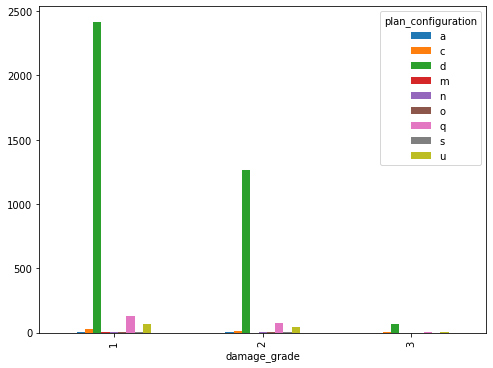

In [ ]:
#plot the graph for the plan configuration against the damage grade

data_analysed.groupby('damage_grade').plan_configuration.value_counts().unstack().plot.bar(figsize=(8,6))

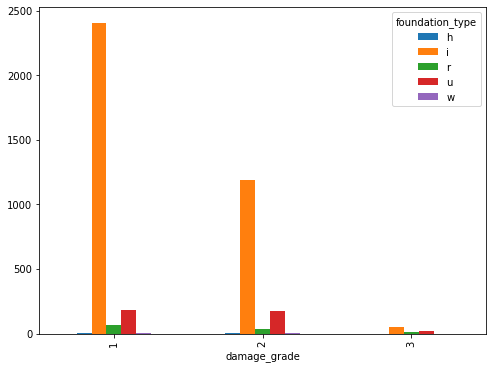

In [ ]:
#plot the graph for the foundation type against the damage grade

data_analysed.groupby('damage_grade').foundation_type.value_counts().unstack().plot.bar(figsize=(8,6))

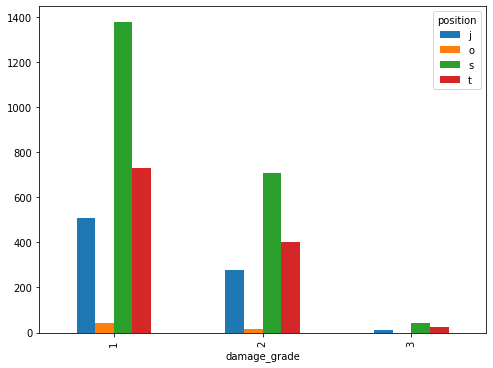

In [ ]:
#plot the graph for the position type against the damage grade

data_analysed.groupby('damage_grade').position.value_counts().unstack().plot.bar(figsize=(8,6))

#4.2. RESULT

After analysing the data set according to the research question, a conculsion based on the data set was drawn which are,

**DAMAGE GRADE 1**

Configuration type   position   Foundation type
      d                 s            i           = 1090 buildings
      q                 s            i           = 89 buildings
      d                 s            u           = 84 buildings

**DAMAGE GRADE**

Configuration type   position   Foundation type
      d                 s            i           = 520 buildings
              